# Code for generating plots for Fig. 4C,E
Run this code sequentially cell by cell.

In [1]:
from matplotlib import pyplot as plt
import sys
import os
import time
import shutil
import json
import numpy as np

In [2]:
currdir=os.getcwd()

In [4]:
# file with coordinates of wells with different A and T

file=open(currdir+'\\data_Fig_4\\shape_table.csv')
print(file.readline())
shapes = np.array([np.array(list(map(int, line.split(',')))) for line in file])
file.close()
print(len(shapes))
print(shapes[-1])
shapesraw=shapes

#print("removing wells with problems")
#shapes=shapes[shapes[:,4]==0]
print(len(shapes))

ï»¿stage_position,position_within_field_of_view,sine_amplitude,sine_period

240
[79  2 20  0]
240


In [5]:
T100A20=shapes[np.logical_and(shapes[:,3]==100,shapes[:,2]==20)][:,[0,1]]
T50A20=shapes[np.logical_and(shapes[:,3]==50,shapes[:,2]==20)][:,[0,1]]
T20A20=shapes[np.logical_and(shapes[:,3]==20,shapes[:,2]==20)][:,[0,1]]
T10A20=shapes[np.logical_and(shapes[:,3]==10,shapes[:,2]==20)][:,[0,1]]
T100A10=shapes[np.logical_and(shapes[:,3]==100,shapes[:,2]==10)][:,[0,1]]
T50A10=shapes[np.logical_and(shapes[:,3]==50,shapes[:,2]==10)][:,[0,1]]
T20A10=shapes[np.logical_and(shapes[:,3]==20,shapes[:,2]==10)][:,[0,1]]
T10A10=shapes[np.logical_and(shapes[:,3]==10,shapes[:,2]==10)][:,[0,1]]
flat=shapes[shapes[:,3]==0][:,[0,1]]

print([len(T100A20),len(T50A20),len(T20A20),len(T10A20),len(T100A10),len(T50A10),len(T20A10),len(T10A10),len(flat)])

[20, 20, 20, 20, 20, 20, 20, 20, 80]


# number of sectors and their size, no AB

In [6]:
def plot_av(data,qx=1,out_data=False):
    tmp=np.array(data)
    av=np.mean(tmp[:,:,1],axis=0)
    nsam=len(tmp[:,0,0])
    std=np.std(tmp[:,:,1],axis=0)/np.sqrt(nsam)
    if (out_data==True):
        return tmp[0,:,0]*qx,av,std
    else:
        plt.errorbar(tmp[0,:,0]*qx,av,std)

In [8]:
file=open(currdir+'\\data_Fig_4\\sectors_20230517_2_2_v2_1.csv')
print(file.readline())
#secs=[map(int,line.split(',')) for line in file]
secs = [np.array(list(map(int, line.split(',')))) for line in file]
file.close()
secsizes=[s[9:] for s in secs]
secs=np.array([s[0:9] for s in secs])
print(secs[-1])
print(secsizes[-1])

pi,ti,zi,ni,n1,n2,ns1,ns2,Nsecs,xpos

[ 79  42   0   2 287   0   0   1   1]
[  0 286]


In [9]:
allsecs=secs.copy() # this will be appened by other data sets later
tpoints=[0,np.max(secs[:,1])]
print(tpoints)

[0, 42]


In [10]:
def avsecs(wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(secs[:,0]==pi,secs[:,3]==ni)
        if (sel.any()==True): tmp.append(secs[sel][:,[1,8]])
    return tmp

def avsecsS(wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(secs[:,0]==pi,secs[:,3]==ni)
        if (sel.any()==True): tmp.append(secs[sel][:,[1,7]])
    return tmp

def avsecsR(wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(secs[:,0]==pi,secs[:,3]==ni)
        if (sel.any()==True): tmp.append(secs[sel][:,[1,6]])
    return tmp

def avsecR(wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(secs[:,0]==pi,secs[:,3]==ni)
        if (sel.any()==True): tmp.append([[x,1.*r/(r+s)] for x,s,r in secs[sel][:,[1,4,5]]])
    return tmp

def avsecS(wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(secs[:,0]==pi,secs[:,3]==ni)
        if (sel.any()==True): tmp.append([[x,1.*s/(r+s)] for x,s,r in secs[sel][:,[1,4,5]]])
    return tmp

## average number of sectors 0.5ug/ml RIF

In [12]:
file=open(currdir+'\\data_Fig_4\\sectors_20230517_2_3_v2_1.csv')
print(file.readline())
#secs=[map(int,line.split(',')) for line in file]
secs = [np.array(list(map(int, line.split(',')))) for line in file]
file.close()
secsizes=[s[9:] for s in secs]
secs=np.array([s[0:9] for s in secs])
print(secs[-1])
print(secsizes[-1])

tbreak=1
allsecs=np.concatenate((allsecs,secs+[0,allsecs[-1,1]+tbreak,0,0,0,0,0,0,0])) # append new sectors to the old ones
tpoints.append(tpoints[-1]+tbreak+np.max(secs[:,1]))
print(tpoints)

pi,ti,zi,ni,n1,n2,ns1,ns2,Nsecs,xpos

[ 79  49   0   2 221  66   4   4   8]
[  0   9 112 136 144 153 223 246 286]
[0, 42, 92]


## number of sectors and their size in RIF 1ug/ml

In [13]:
file=open(currdir+'\\data_Fig_4\\sectors_20230517_switched_RIF_1ug_v2_1.csv')
print(file.readline())
#secs=[map(int,line.split(',')) for line in file]
secs = [np.array(list(map(int, line.split(',')))) for line in file]
file.close()
secsizes=[s[9:] for s in secs]
secs=np.array([s[0:9] for s in secs])
print(secs[-1])
print(secsizes[-1])

tbreak=2
allsecs=np.concatenate((allsecs,secs+[0,allsecs[-1,1]+tbreak,0,0,0,0,0,0,0])) # append new sectors to the old ones
tpoints.append(tpoints[-1]+tbreak+np.max(secs[:,1]))
print(tpoints)

pi,ti,zi,ni,n1,n2,ns1,ns2,Nsecs,xpos

[ 79  44   0   2   0 287   1   0   1]
[  0 286]
[0, 42, 92, 138]


In [79]:
# this, if uncommented, will create the file used in the Mathematica notebook Fig_4ABF.nb
# np.savetxt("flat_R_fraction_RIF_1ug.txt",np.array(avsecR(flat,secs))[:,:,1])

## number of sectors and their size after switching off RIF

In [14]:
file=open(currdir+'\\data_Fig_4\\sectors_20230517_switched_back_to_LB_v2_1.csv')
print(file.readline())
#secs=[map(int,line.split(',')) for line in file]
secs = [np.array(list(map(int, line.split(',')))) for line in file]
file.close()
secsizes=[s[9:] for s in secs]
secs=np.array([s[0:9] for s in secs])
print(secs[-1])
print(secsizes[-1])

tbreak=1
allsecs=np.concatenate((allsecs,secs+[0,allsecs[-1,1]+tbreak,0,0,0,0,0,0,0])) # append new sectors to the old ones
tpoints.append(tpoints[-1]+tbreak+np.max(secs[:,1]))
print(tpoints)

pi,ti,zi,ni,n1,n2,ns1,ns2,Nsecs,xpos

[ 79  47   0   2   0 287   1   0   1]
[  0 286]
[0, 42, 92, 138, 186]


# Fig. 4C

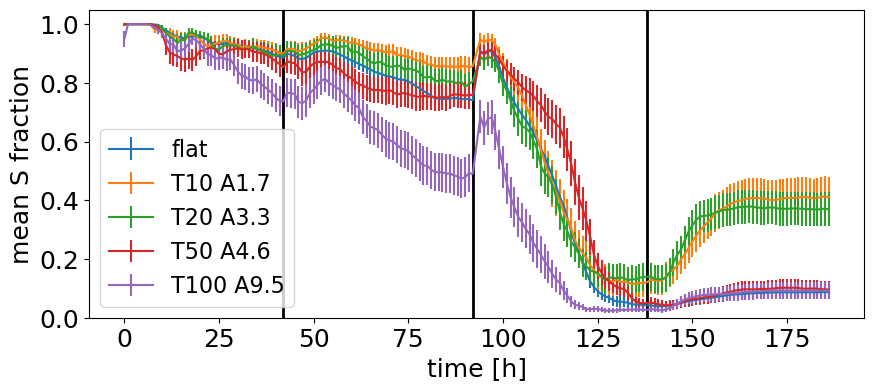

In [16]:
plt.rcParams['font.size'] = '18'
plot_av(avsecS(flat,allsecs),qx=1.)
plot_av(avsecS(T10A20,allsecs),qx=1.)
plot_av(avsecS(T20A20,allsecs),qx=1.)
plot_av(avsecS(T50A10,allsecs),qx=1.)
plot_av(avsecS(T100A20,allsecs),qx=1.)
plt.legend(('flat','T10 A1.7','T20 A3.3','T50 A4.6','T100 A9.5'),fontsize=16)
plt.xlabel("time [h]",fontsize=18); plt.ylabel("mean S fraction",fontsize=18)
plt.ylim(bottom=0)
plt.axvline(x=tpoints[1],linewidth=2,color='black')
plt.axvline(x=tpoints[2],linewidth=2,color='black')
plt.axvline(x=tpoints[3],linewidth=2,color='black')
plt.show()

## this creates Fig. S6

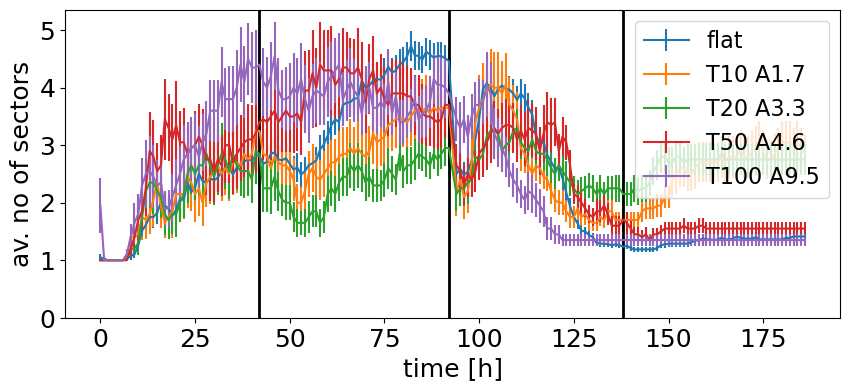

In [27]:
plot_av(avsecs(flat,allsecs),qx=1.)
plot_av(avsecs(T10A20,allsecs),qx=1.)
plot_av(avsecs(T20A20,allsecs),qx=1.)
plot_av(avsecs(T50A10,allsecs),qx=1.)
plot_av(avsecs(T100A20,allsecs),qx=1.)
plt.legend(('flat','T10 A1.7','T20 A3.3','T50 A4.6','T100 A9.5'),fontsize=16)
plt.xlabel("time [h]"); plt.ylabel("av. no of sectors")
plt.ylim(bottom=0)
plt.axvline(x=tpoints[1],linewidth=2,color='black')
plt.axvline(x=tpoints[2],linewidth=2,color='black')
plt.axvline(x=tpoints[3],linewidth=2,color='black')
plt.show()
plt.rcParams['font.size'] = '12'

## mean fractions of green cells before/after RIF

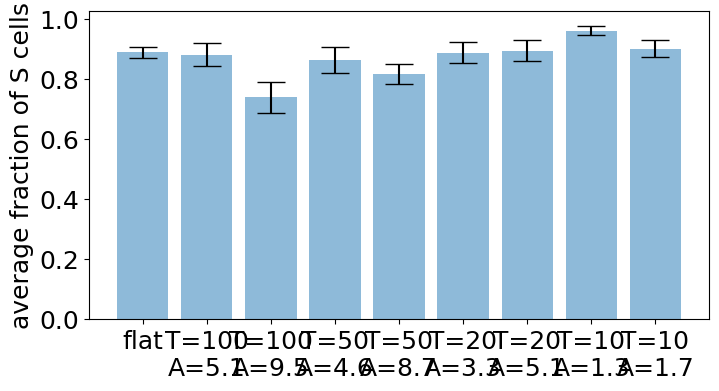

<Figure size 800x400 with 0 Axes>

In [18]:
def avsecsT(ti,wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(np.logical_and(secs[:,0]==pi,secs[:,3]==ni),secs[:,1]==ti)
        if (sel.any()==True): tmp.append(secs[sel][:,7])  # green (sensitive) sectors
    return tmp

def avsecRT(ti,wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(np.logical_and(secs[:,0]==pi,secs[:,3]==ni),secs[:,1]==ti)
        if (sel.any()==True): tmp.append([1.*r/(r+s) for s,r in secs[sel][:,[4,5]]])
    return tmp

def avsecST(ti,wells,secs):
    #pi,ti,zi,ni,secs,xpos
# this data has only one z so no z selection is required
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(np.logical_and(secs[:,0]==pi,secs[:,3]==ni),secs[:,1]==ti)
        if (sel.any()==True): tmp.append([1.*s/(r+s) for s,r in secs[sel][:,[4,5]]])
    return tmp

def avsector(wells):
    tmp=avsecST(41,wells,allsecs)
    return np.mean(tmp), np.std(tmp)/np.sqrt(len(tmp))

data1=np.array([avsector(flat),avsector(T100A10),avsector(T100A20),avsector(T50A10),avsector(T50A20),avsector(T20A10),
               avsector(T20A20),avsector(T10A10),avsector(T10A20)])
plt.rcParams["figure.figsize"] = (8,4)
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
x_pos=[0,1,2,3,4,5,6,7,8]
ax.set_xticks(x_pos)
ax.set_xticklabels(["flat","T=100\nA=5.1","T=100\nA=9.5","T=50\nA=4.6","T=50\nA=8.7","T=20\nA=3.3","T=20\nA=5.1","T=10\nA=1.3","T=10\nA=1.7"])
ax.set_ylabel('average fraction of S cells')
plt.figure(facecolor='w')
ax.bar(x_pos,data1[:,0],yerr=data1[:,1],align='center', alpha=0.5, ecolor='black', capsize=10)
plt.show()

[[0.08671934 0.02098849]
 [0.07488334 0.02011255]
 [0.091954   0.02808793]
 [0.09958946 0.0290632 ]
 [0.1806921  0.06608351]
 [0.1550875  0.04161298]
 [0.36956947 0.05742512]
 [0.21598324 0.03986657]
 [0.40674572 0.06739012]]


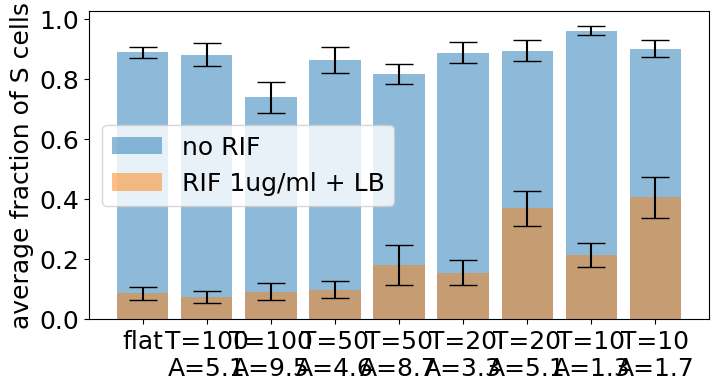

<Figure size 800x400 with 0 Axes>

In [19]:
def avsector(wells):
    tmp=avsecST(182,wells,allsecs)
    return np.mean(tmp), np.std(tmp)/np.sqrt(len(tmp))

data2=np.array([avsector(flat),avsector(T100A10),avsector(T100A20),avsector(T50A10),avsector(T50A20),avsector(T20A10),
               avsector(T20A20),avsector(T10A10),avsector(T10A20)])
print(data2)
plt.rcParams["figure.figsize"] = (8,4)
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
x_pos=[0,1,2,3,4,5,6,7,8]
ax.set_xticks(x_pos)
ax.set_xticklabels(["flat","T=100\nA=5.1","T=100\nA=9.5","T=50\nA=4.6","T=50\nA=8.7","T=20\nA=3.3","T=20\nA=5.1","T=10\nA=1.3","T=10\nA=1.7"])
ax.set_ylabel('average fraction of S cells')
plt.figure(facecolor='w')
ax.bar(x_pos,data1[:,0],yerr=data1[:,1],align='center', alpha=0.5, ecolor='black', capsize=10, label="no RIF")
ax.bar(x_pos,data2[:,0],yerr=data2[:,1],align='center', alpha=0.5, ecolor='black', capsize=10, label="RIF 1ug/ml + LB")
ax.legend()
plt.show()

# Fig. 4E

[[0.09756565 0.02371009]
 [0.08493829 0.0231071 ]
 [0.12442247 0.03895945]
 [0.11524464 0.03410759]
 [0.22118547 0.08139603]
 [0.17450272 0.04729535]
 [0.41336067 0.06621088]
 [0.22455108 0.04159006]
 [0.45104772 0.07597095]]


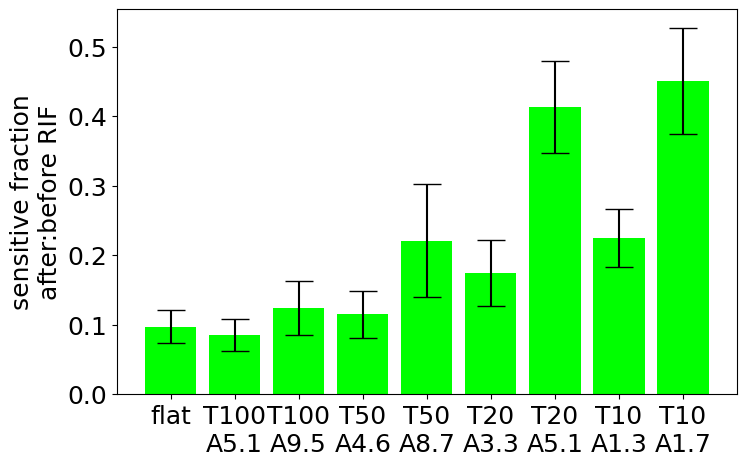

<Figure size 800x500 with 0 Axes>

In [20]:
data3=np.array([[data2[i,0]/data1[i,0],np.sqrt(data2[i,1]**2/data1[i,0]**2+(data1[i,1]**2 * data2[i,0]**2)/data1[i,0]**4)] for i in range(0,9)])
print(data3)
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['font.size'] = '18'
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
x_pos=[0,1,2,3,4,5,6,7,8]
ax.set_xticks(x_pos)
ax.set_xticklabels(["flat","T100\nA5.1","T100\nA9.5","T50\nA4.6","T50\nA8.7","T20\nA3.3","T20\nA5.1","T10\nA1.3","T10\nA1.7"])
ax.set_ylabel('sensitive fraction\nafter:before RIF')
plt.figure(facecolor='w')
ax.bar(x_pos,data3[:,0],yerr=data3[:,1],align='center', ecolor='black', color='#00ff00', capsize=10)
plt.show()
plt.rcParams['font.size'] = '12'